In [6]:
import pandas as pd 
from pandas import Series
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [7]:
#Importing data
Beijing = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/BeijingPM20100101_20151231.csv") 
Shanghai = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ShanghaiPM20100101_20151231.csv") 
Chengdu = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ChengduPM20100101_20151231.csv") 
Shenyang = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ShenyangPM20100101_20151231.csv") 
Guangzhou = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/GuangzhouPM20100101_20151231.csv") 

In [8]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Shanghai.drop(['PM_Jingan', 'season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Chengdu.drop(['PM_Caotangsi', 'PM_Shahepu','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Shenyang.drop(['PM_Taiyuanjie', 'PM_Xiaoheyan','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Guangzhou.drop(['PM_City Station', 'PM_5th Middle School','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)

In [9]:
city = [Beijing, Shanghai, Chengdu, Shenyang, Guangzhou]
for i in city:
    # remove na
    i.dropna(axis=0, how="any",inplace=True)
    # from datetime import datetime
    i['Time'] = pd.to_datetime(i['year'].map(str) +"/"+ i['month'].map(str) +"/"+ i['day'].map(str)+" "+i['hour'].map(str)+":00:00")


In [10]:
#add index to formulate as time series data
Beijing.dropna(axis=0, how="any", inplace=True)
Beijing['Time'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str)+" "+Beijing['hour'].map(str)+":00:00")

Shanghai.dropna(axis=0, how="any", inplace=True)
Shanghai['Time'] = pd.to_datetime(Shanghai['year'].map(str) +"/"+ Shanghai['month'].map(str) +"/"+ Shanghai['day'].map(str)+" "+Shanghai['hour'].map(str)+":00:00")

Chengdu.dropna(axis=0, how="any", inplace=True)
Chengdu['Time'] = pd.to_datetime(Chengdu['year'].map(str) +"/"+ Chengdu['month'].map(str) +"/"+ Chengdu['day'].map(str)+" "+Chengdu['hour'].map(str)+":00:00")

Shenyang.dropna(axis=0, how="any", inplace=True)
Shenyang['Time'] = pd.to_datetime(Shenyang['year'].map(str) +"/"+ Shenyang['month'].map(str) +"/"+ Shenyang['day'].map(str)+" "+Shenyang['hour'].map(str)+":00:00")

Guangzhou.dropna(axis=0, how="any", inplace=True)
Guangzhou['Time'] = pd.to_datetime(Guangzhou['year'].map(str) +"/"+ Guangzhou['month'].map(str) +"/"+ Guangzhou['day'].map(str)+" "+Chengdu['hour'].map(str)+":00:00")


In [11]:
Beijing_1 = Beijing.groupby(['Time']).mean()
Shanghai_1 = Shanghai.groupby(['Time']).mean()
Chengdu_1 = Chengdu.groupby(['Time']).mean()
Shenyang_1 = Shenyang.groupby(['Time']).mean()
Guangzhou_1 = Guangzhou.groupby(['Time']).mean()

In [12]:
city_1 = [Beijing_1, Shanghai_1, Chengdu_1, Shenyang_1, Guangzhou_1]

for i in city_1:
    i.index = pd.to_datetime(i.index, 
                             format='%d-%m-%Y %H:%M:%S')
    i = i.set_index(i.index).asfreq('H')
    i = i.fillna(method='ffill')
    i['Time'] = i.index
    

In [13]:
#transform the index unit as hour 
#fill up missing data
Beijing_1.index = pd.to_datetime(Beijing_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Beijing_1 = Beijing_1.set_index(Beijing_1.index).asfreq('H')
Beijing_1 = Beijing_1.fillna(method='ffill')
Beijing_1['Time'] = Beijing_1.index

Shanghai_1.index = pd.to_datetime(Shanghai_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shanghai_1 = Shanghai_1.set_index(Shanghai_1.index).asfreq('H')
Shanghai_1 = Shanghai_1.fillna(method='ffill')
Shanghai_1['Time'] = Shanghai_1.index

Chengdu_1.index = pd.to_datetime(Chengdu_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Chengdu_1 = Chengdu_1.set_index(Chengdu_1.index).asfreq('H')
Chengdu_1 = Chengdu_1.fillna(method='ffill')
Chengdu_1['Time'] = Chengdu_1.index

Shenyang_1.index = pd.to_datetime(Shenyang_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shenyang_1 = Shenyang_1.set_index(Shenyang_1.index).asfreq('H')
Shenyang_1 = Shenyang_1.fillna(method='ffill')
Shenyang_1['Time'] = Shenyang_1.index

Guangzhou_1.index = pd.to_datetime(Guangzhou_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Guangzhou_1 = Guangzhou_1.set_index(Guangzhou_1.index).asfreq('H')
Guangzhou_1 = Guangzhou_1.fillna(method='ffill')
Guangzhou_1['Time'] = Guangzhou_1.index

In [14]:
#select the right data range
Beijing_13 = Beijing_1[(Beijing_1['Time'] >=pd.to_datetime('20130501030000')) & (Beijing_1['Time'] <= pd.to_datetime('20150430030000'))]
Shanghai_13 = Shanghai_1[(Shanghai_1['Time'] >=pd.to_datetime('20130501030000')) & (Shanghai_1['Time'] <= pd.to_datetime('20150430030000'))]
Chengdu_13 = Chengdu_1[(Chengdu_1['Time'] >=pd.to_datetime('20130501030000')) & (Chengdu_1['Time'] <= pd.to_datetime('20150430030000'))]
Shenyang_13 = Shenyang_1[(Shenyang_1['Time'] >=pd.to_datetime('20130501030000')) & (Shenyang_1['Time']<= pd.to_datetime('20150430030000'))]
Guangzhou_13 = Guangzhou_1[(Guangzhou_1['Time'] >=pd.to_datetime('20130501030000')) & (Guangzhou_1['Time'] <= pd.to_datetime('20150430030000'))]


In [15]:
#transform the time series data to daily frequency 
city_13 = [Beijing_13, Shanghai_13, Chengdu_13, Shenyang_13, Guangzhou_13]

Beijing_13 = Beijing_13.set_index(Beijing_13.index).asfreq('D')
Shanghai_13 = Shanghai_13.set_index(Shanghai_13.index).asfreq('D')
Chengdu_13 = Chengdu_13.set_index(Chengdu_13.index).asfreq('D')
Shenyang_13 = Shenyang_13.set_index(Shenyang_13.index).asfreq('D')
Guangzhou_13 = Guangzhou_13.set_index(Guangzhou_13.index).asfreq('D')

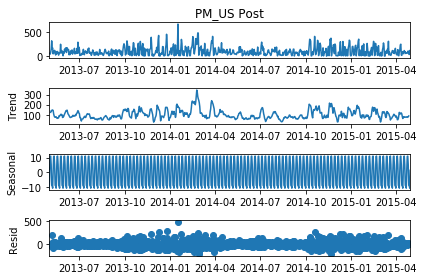

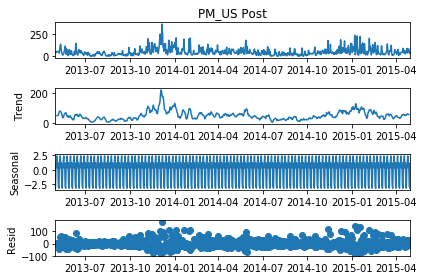

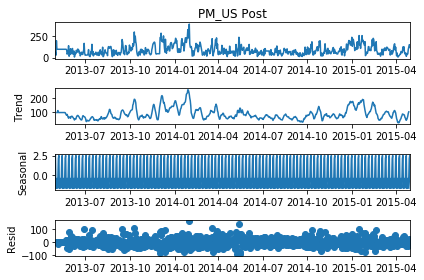

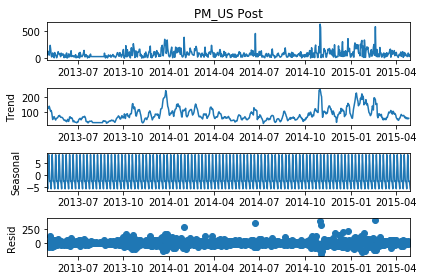

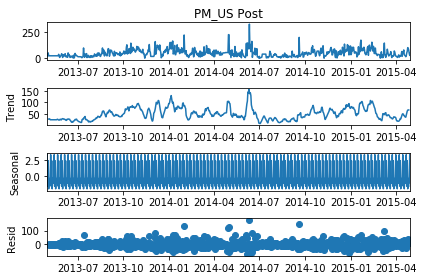

In [11]:
#seasonal decomposition for 5 cities
split_result = seasonal_decompose(Beijing_13['PM_US Post'],  
                            model ='additive') 
split_result.plot();


split_result = seasonal_decompose(Shanghai_13['PM_US Post'],  
                            model ='additive') 
split_result.plot();

split_result = seasonal_decompose(Chengdu_13['PM_US Post'],  
                            model ='additive') 
split_result.plot();

split_result = seasonal_decompose(Shenyang_13['PM_US Post'],  
                            model ='additive') 
split_result.plot();

split_result = seasonal_decompose(Guangzhou_13['PM_US Post'],  
                            model ='additive') 
split_result.plot();


In [30]:
#construct the dataset for all 5 cities
dataset_full = pd.merge(Beijing_13[['PM_US Post']], Shanghai_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Chengdu_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Shenyang_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Guangzhou_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)

In [31]:
dataset_full.columns = ["Beijing_PM2.5", "Shanghai_PM2.5", "Chengdu_PM2.5", "Shenyang_PM2.5", "Guangzhou_PM2.5"] #"Chengdu_PM2.5", "Guangzhou_PM2.5"
dataset = dataset_full
dataset


,Beijing_PM2.5,Shanghai_PM2.5,Chengdu_PM2.5,Shenyang_PM2.5,Guangzhou_PM2.5
Time,,,,,
2013-05-01 03:00:00,59.0,42.0,60.0,63.0,18.0
2013-05-02 03:00:00,57.0,40.0,28.0,133.0,24.0
2013-05-03 03:00:00,44.0,56.0,195.0,125.0,52.0
2013-05-04 03:00:00,83.0,51.0,96.0,103.0,24.0
2013-05-05 03:00:00,144.0,53.0,96.0,58.0,24.0
...,...,...,...,...,...
2015-04-26 03:00:00,107.0,51.0,94.0,98.0,96.0
2015-04-27 03:00:00,80.0,60.0,120.0,73.0,78.0
2015-04-28 03:00:00,35.0,49.0,148.0,33.0,47.0


In [32]:
# Split data into train / test sets 
train = dataset[:len(dataset)-146:] 
test = dataset[len(dataset)-146:]

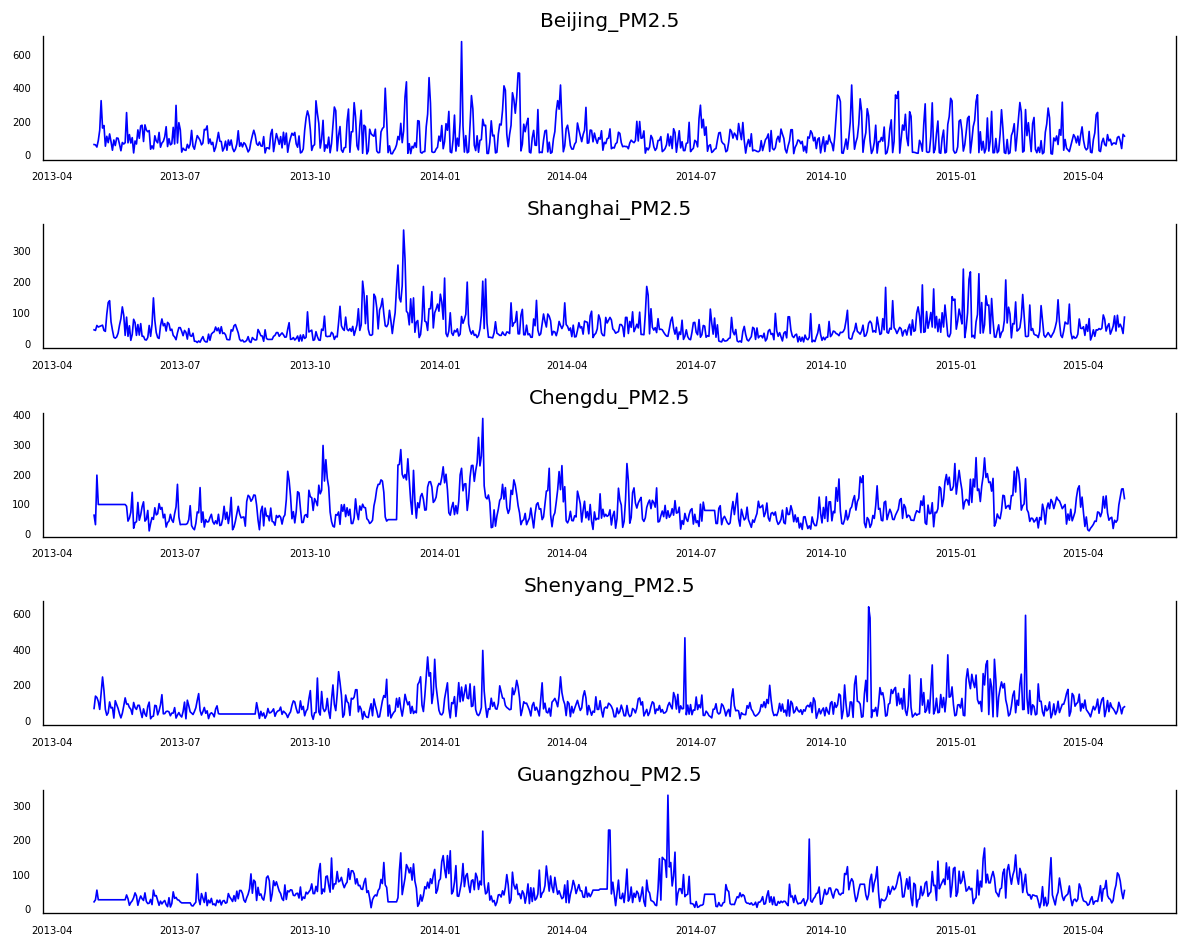

In [15]:
#preliminary plots of each variable
fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=1, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

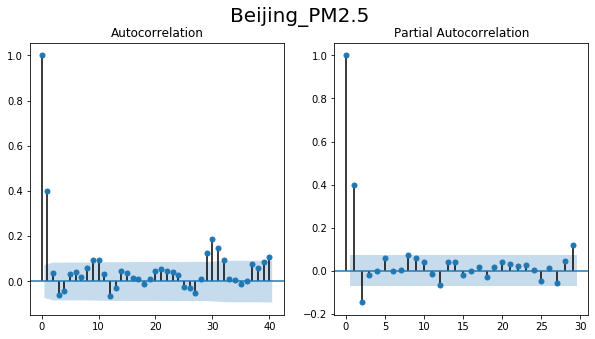

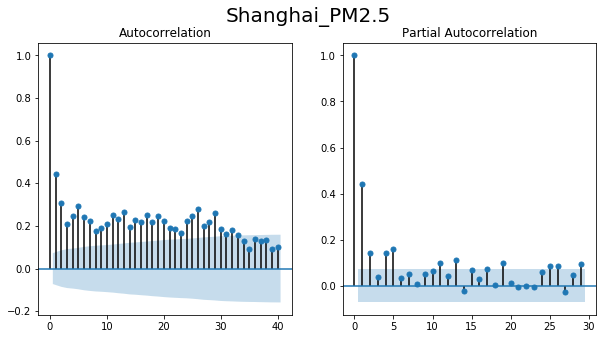

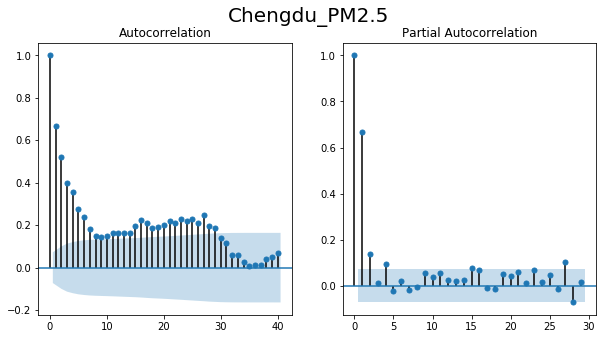

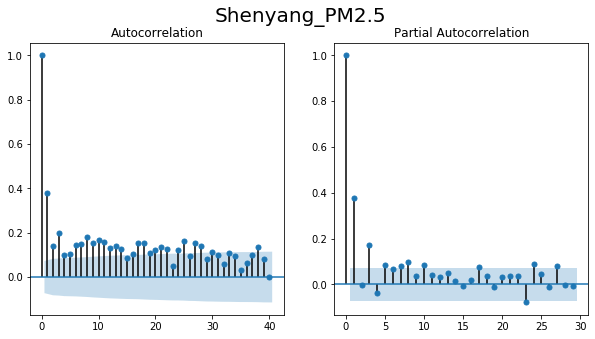

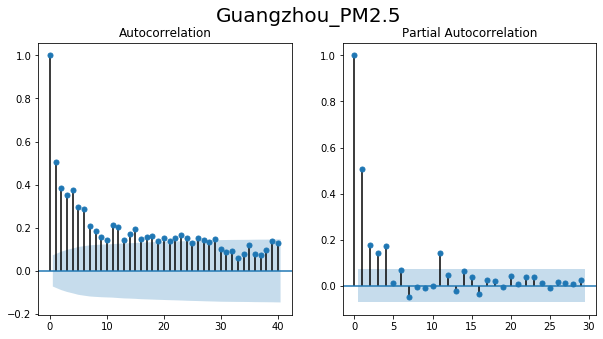

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Beijing_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Beijing_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Beijing_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Shanghai_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Shanghai_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Shanghai_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Chengdu_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Chengdu_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Chengdu_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Shenyang_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Shenyang_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Shenyang_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Guangzhou_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Guangzhou_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Guangzhou_PM2.5'], ax = ax[1])

In [19]:
#function for granger causation test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dataset, variables = dataset.columns)     

,Beijing_PM2.5_x,Shanghai_PM2.5_x,Chengdu_PM2.5_x,Shenyang_PM2.5_x,Guangzhou_PM2.5_x
Beijing_PM2.5_y,1.0000,0.1580,0.001,0.0003,0.0036
Shanghai_PM2.5_y,0.0023,1.0000,0.000,0.0000,0.0050
Chengdu_PM2.5_y,0.1144,0.0001,1.000,0.2600,0.0879
Shenyang_PM2.5_y,0.5559,0.0030,0.000,1.0000,0.0000
Guangzhou_PM2.5_y,0.0057,0.0000,0.000,0.0195,1.0000


In [20]:
#Johansen Cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Cointegration Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dataset)

Name   ::  Cointegration Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Beijing_PM2.5 ::  310.68    > 60.0627   =>   True
Shanghai_PM2.5 ::  214.31    > 40.1749   =>   True
Chengdu_PM2.5 ::  126.83    > 24.2761   =>   True
Shenyang_PM2.5 ::  53.93     > 12.3212   =>   True
Guangzhou_PM2.5 ::  3.66      > 4.1296    =>   False


In [39]:
# take aDFuller test the statioinarity of  the timeseries
def test_stationarity(timeseries, col):
 #perfprmance Dickey_Fuller Test
    print('Resluts of Dickey-Fuller Test: ' + col)
    dftest=adfuller(timeseries,autolag='AIC')
    output = {'test_statistic':round(dftest[0], 4), 'pvalue':round(dftest[1], 4), 'n_lags':round(dftest[2], 4), 'n_obs':dftest[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)
    dfountput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','Number of obervations used'])
 
    for key,value in dftest[4].items():
        dfountput['Critical Value(%s)'%key]=value
        
    print(dfountput)
    if p_value <= 0.05:
        print(" => Series is Stationary.")
    else:
        print(" => Series is Non-Stationary.") 
# 

In [40]:
for i in train.columns:
    test_stationarity(train[i],i)
    print("\n")

Resluts of Dickey-Fuller Test: Beijing_PM2.5
Test Statistic               -1.449274e+01
p-value                       6.110486e-27
#lags used                    1.000000e+00
Number of obervations used    5.820000e+02
Critical Value(1%)           -3.441636e+00
Critical Value(5%)           -2.866519e+00
Critical Value(10%)          -2.569422e+00
dtype: float64
 => Series is Stationary.


Resluts of Dickey-Fuller Test: Shanghai_PM2.5
Test Statistic                 -3.019492
p-value                         0.033114
#lags used                     14.000000
Number of obervations used    569.000000
Critical Value(1%)             -3.441895
Critical Value(5%)             -2.866633
Critical Value(10%)            -2.569482
dtype: float64
 => Series is Stationary.


Resluts of Dickey-Fuller Test: Chengdu_PM2.5
Test Statistic               -7.119539e+00
p-value                       3.753707e-10
#lags used                    3.000000e+00
Number of obervations used    5.800000e+02
Critical Value(1%)

In [24]:
train_diff = train.diff().dropna()

In [25]:
train_diff

,Beijing_PM2.5,Shanghai_PM2.5,Chengdu_PM2.5,Shenyang_PM2.5,Guangzhou_PM2.5
Time,,,,,
2013-05-02 03:00:00,-2.0,-2.0,-32.0,70.0,6.0
2013-05-03 03:00:00,-13.0,16.0,167.0,-8.0,28.0
2013-05-04 03:00:00,39.0,-5.0,-99.0,-22.0,-28.0
2013-05-05 03:00:00,61.0,2.0,0.0,-45.0,0.0
2013-05-06 03:00:00,176.0,2.0,0.0,95.0,0.0
...,...,...,...,...,...
2014-12-01 03:00:00,-214.0,49.0,0.0,-55.0,-23.0
2014-12-02 03:00:00,0.0,-37.0,-1.0,10.0,65.0
2014-12-03 03:00:00,-2.0,3.0,20.0,12.0,-5.0


In [26]:
#perform VAR modeling
from statsmodels.tsa.api import VAR
model = VAR(train_diff)
#for i in [1,2,3,4,5,7,8,9,10,11,12,13,14,15]:
#    result = model.fit(i)
#    print('Lag Order =', i)
#    print('AIC : ', result.aic)
#    print('BIC : ', result.bic)
#    print('FPE : ', result.fpe)
#    print('HQIC: ', result.hqic, '\n')
    
x = model.select_order(maxlags=50)
x.summary()
#min AIC/FPE: lag 2

,AIC,BIC,FPE,HQIC
0,39.96,40.00,2.271e+17,39.98
1,39.51,39.75,1.440e+17,39.60
2,39.22,39.67*,1.083e+17,39.40
3,39.03,39.67,8.935e+16,39.28*
4,38.95,39.80,8.262e+16,39.28
5,38.93,39.98,8.104e+16,39.34
6,38.89,40.13,7.768e+16,39.38
7,38.91,40.35,7.898e+16,39.47
8,38.87,40.52,7.616e+16,39.51
9,38.84,40.69,7.423e+16,39.57


In [27]:
results = model.fit(maxlags=20, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, May, 2020
Time:                     22:06:42
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    40.7155
Nobs:                     572.000    HQIC:                   39.4170
Log likelihood:          -14813.9    FPE:                5.74483e+16
AIC:                      38.5865    Det(Omega_mle):     3.60130e+16
--------------------------------------------------------------------
Results for equation Beijing_PM2.5
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.381238         3.393364           -0.112           0.911
L1.Beijing_PM2.5           -0.504080         0.045662          -11.039           0.000
L1.Shanghai_PM2.5           

In [28]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = results.resid['Shanghai_PM2.5']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.931, p=0.000
Sample does not look Gaussian (reject H0)


In [29]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 10.037
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.782, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.084, data does not look normal (reject H0)


In [22]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic: [0,4]; 
#close to 2 = no significant serial correlation
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(results.resid)

def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(train.columns, out):
    print(adjust(col), ':', round(val, 2))

Beijing_PM2.5 : 2.01
Shanghai_PM2.5 : 2.0
Chengdu_PM2.5 : 1.97
Shenyang_PM2.5 : 1.99
Guangzhou_PM2.5 : 2.04


In [27]:
test = dataset[len(dataset)-146:]


In [28]:
# Get the lag order
lag_order = results.k_ar
#print(lag_order)

# Input data for forecasting
forecast_input = train_diff.values[-lag_order:]

#results.forecast(dataset.values[-lag_order:], 15)
fc = results.forecast(y=forecast_input, steps=15)
result_forecast = pd.DataFrame(fc, index=dataset.index[-15:], columns=dataset.columns + '_forecast')
#print(result_forecast)
fc_future  = pd.DataFrame(fc, index = test.diff().index[0:15], columns=test.columns + '_forecast')


In [29]:
def invert_transformation(train, result_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = result_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)+ '_forecast'].cumsum()
    return df_fc
df_forecast = invert_transformation(train, result_forecast)   

df_future_result = invert_transformation(train, fc_future)
print(df_forecast.loc[:, ['Beijing_PM2.5_forecast','Shanghai_PM2.5_forecast', 'Chengdu_PM2.5_forecast', 'Shenyang_PM2.5_forecast', 'Guangzhou_PM2.5_forecast']])

                     Beijing_PM2.5_forecast  Shanghai_PM2.5_forecast  \
Time                                                                   
2015-04-16 03:00:00               74.292570                69.181223   
2015-04-17 03:00:00              110.477055                55.254088   
2015-04-18 03:00:00               67.223813                57.713306   
2015-04-19 03:00:00              100.745548                73.938346   
2015-04-20 03:00:00              114.921725                69.782886   
2015-04-21 03:00:00               53.889186                69.716308   
2015-04-22 03:00:00               50.491692                68.952211   
2015-04-23 03:00:00               66.812653                65.409650   
2015-04-24 03:00:00               34.079967                68.846600   
2015-04-25 03:00:00               34.693045                75.894937   
2015-04-26 03:00:00               76.445877                73.830233   
2015-04-27 03:00:00               86.698979                66.31

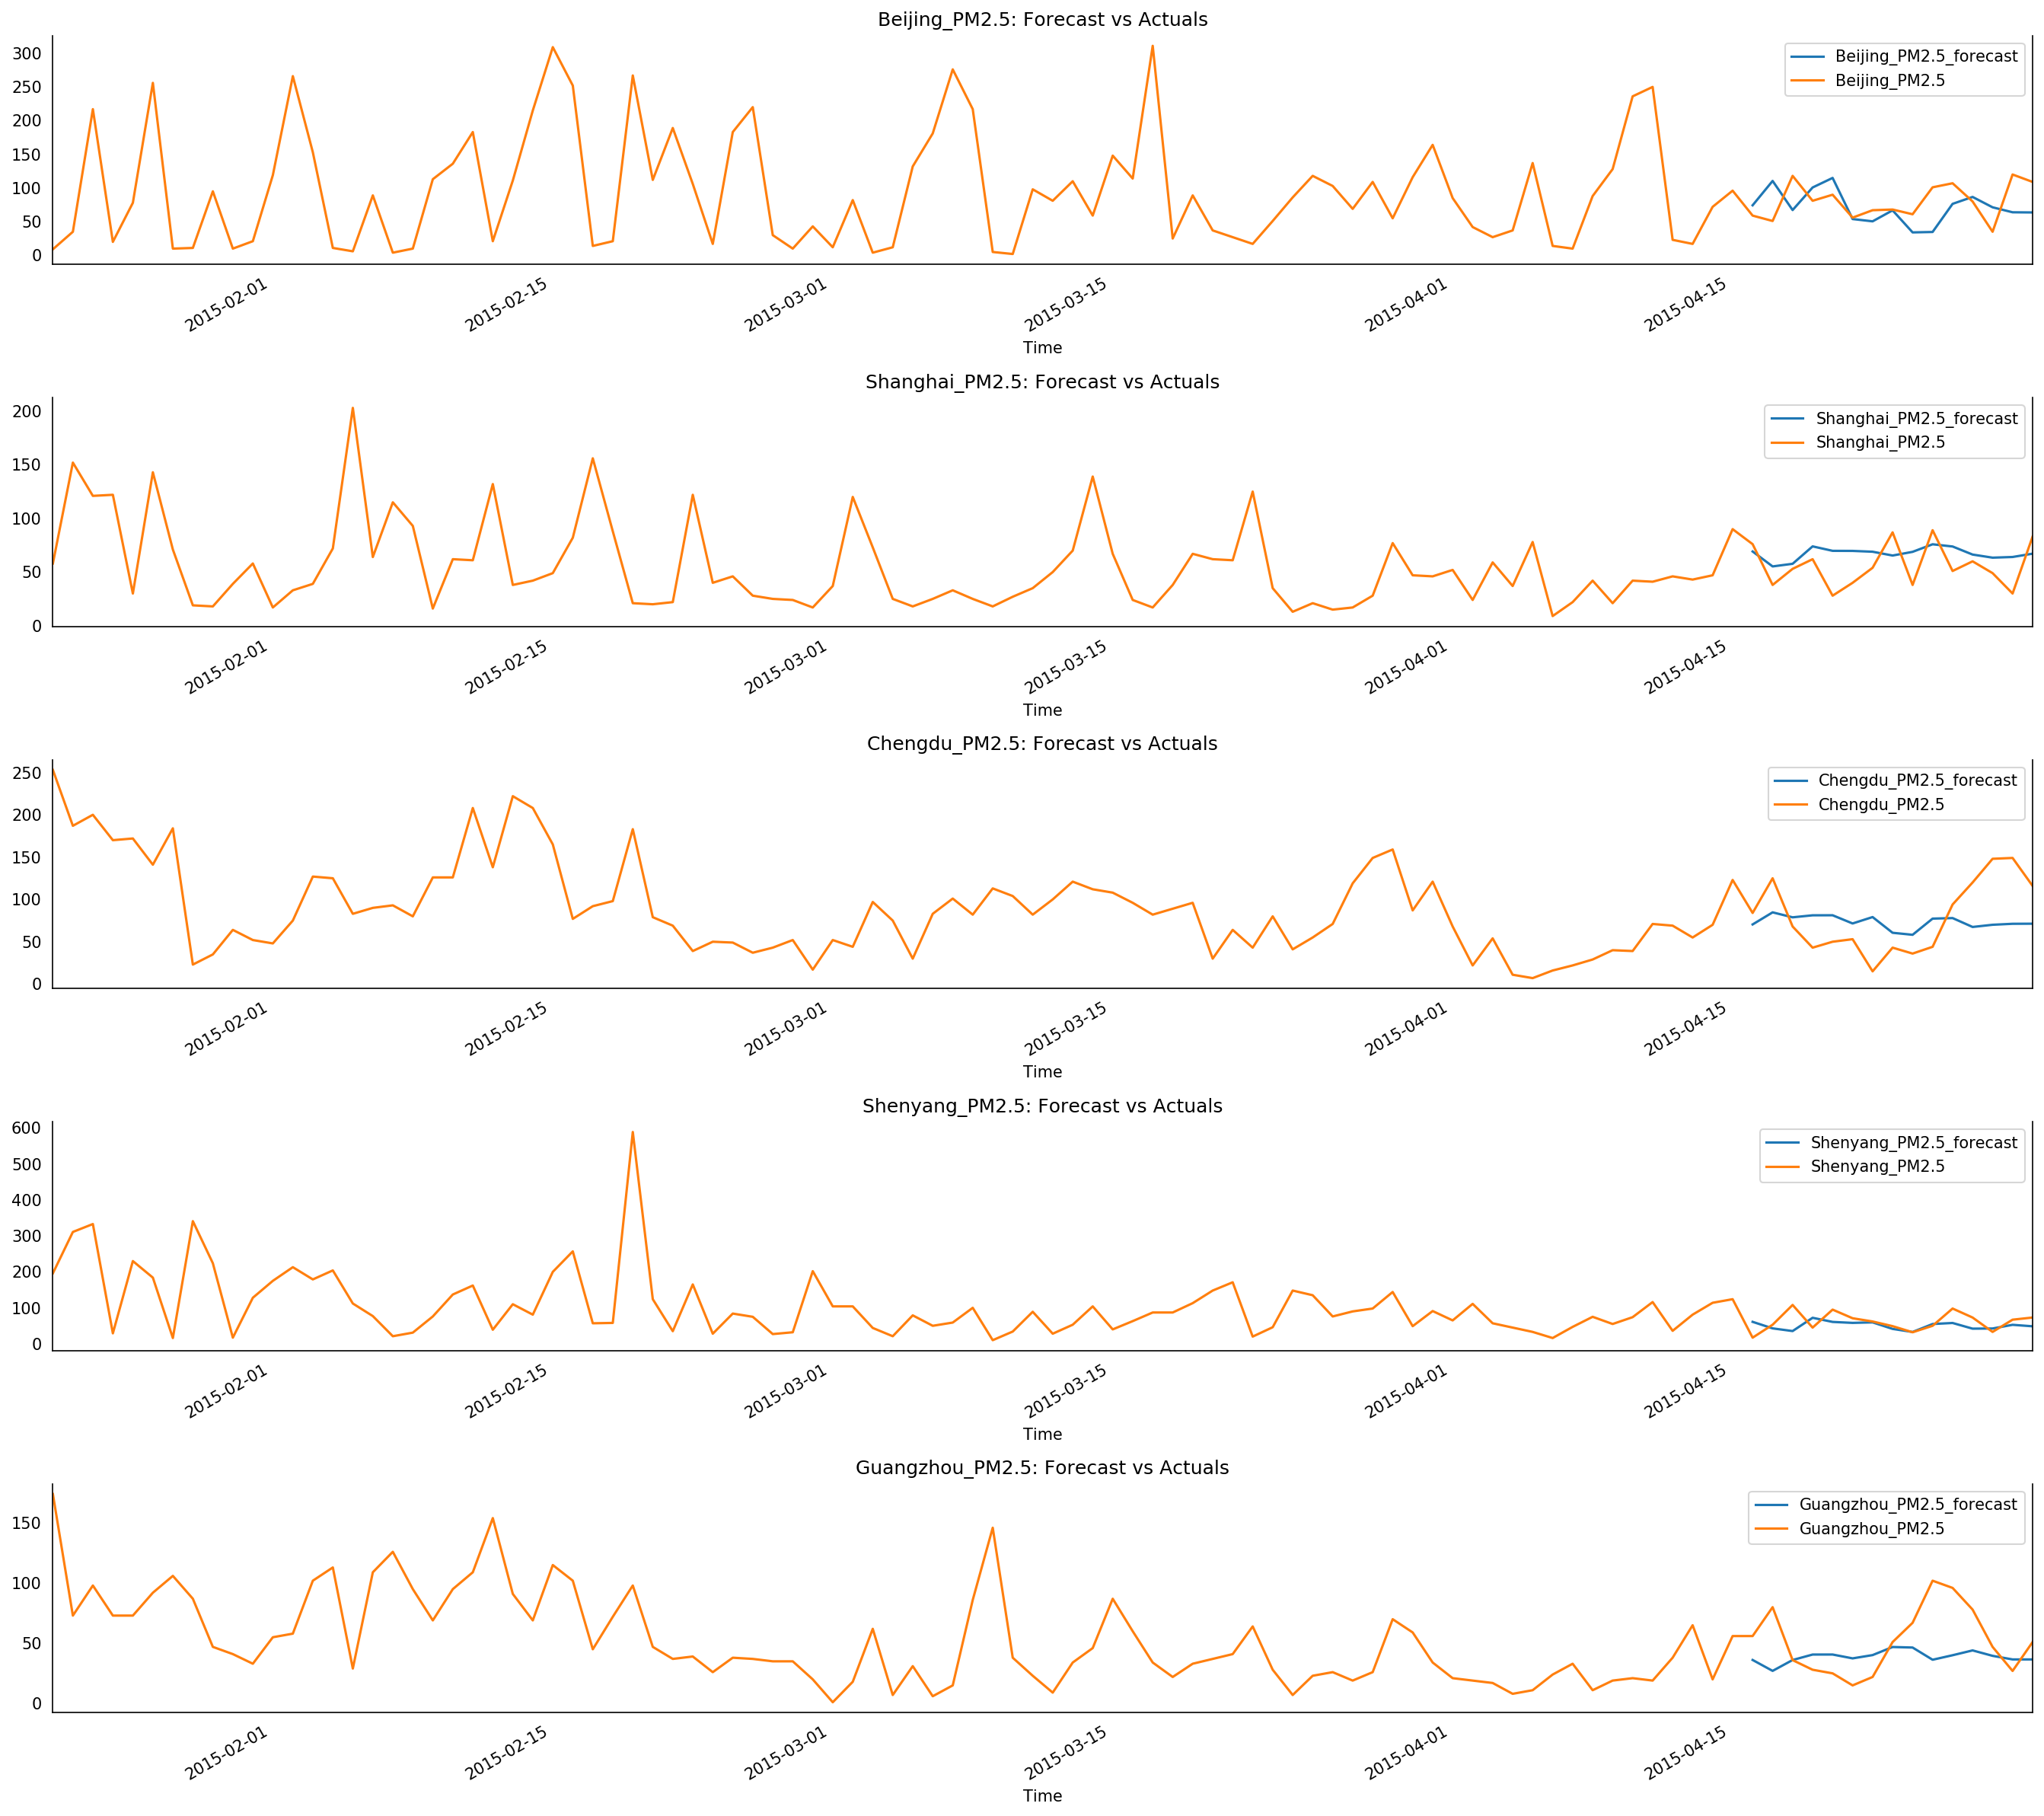

In [34]:
#results.plot_forecast(50, plot_stderr= False); #built-in function: Cannot enlarge/change the figsize

#manually use the data for plotting
fig, axes = plt.subplots(nrows=int(len(dataset.columns)), ncols=1, dpi=150, figsize=(18,16))
for i, (col,ax) in enumerate(zip(dataset.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    dataset[col][-100:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

In [45]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test[['Beijing_PM2.5', 'Shanghai_PM2.5', 'Chengdu_PM2.5', 'Shenyang_PM2.5', 'Guangzhou_PM2.5']][-15:], 
                                  df_forecast[['Beijing_PM2.5_forecast', 'Shanghai_PM2.5_forecast', 'Chengdu_PM2.5_forecast', 'Shenyang_PM2.5_forecast', 'Guangzhou_PM2.5_forecast']][-15:]))
print("Overall RMSE: ", rmse)

Overall RMSE:  33.07454515977008


In [46]:
rmse_BJ = np.sqrt(mean_squared_error(test[['Beijing_PM2.5']][-15:], 
                                  df_forecast[['Beijing_PM2.5_forecast']][-15:]))
print("RMSE for Beijing_PM2.5: ", rmse_BJ)

rmse_SH = np.sqrt(mean_squared_error(test[['Shanghai_PM2.5']][-15:], 
                                  df_forecast[['Shanghai_PM2.5_forecast']][-15:]))
print("RMSE for Shanghai_PM2.5: ", rmse_SH)

rmse_CD = np.sqrt(mean_squared_error(test[['Chengdu_PM2.5']][-15:], 
                                  df_forecast[['Chengdu_PM2.5_forecast']][-15:]))
print("RMSE for Chengdu_PM2.5: ", rmse_CD)

rmse_SY = np.sqrt(mean_squared_error(test[['Shenyang_PM2.5']][-15:], 
                                  df_forecast[['Shenyang_PM2.5_forecast']][-15:]))
print("RMSE for Shenyang_PM2.5: ", rmse_SY)

rmse_GZ = np.sqrt(mean_squared_error(test[['Guangzhou_PM2.5']][-15:], 
                                  df_forecast[['Guangzhou_PM2.5_forecast']][-15:]))
print("RMSE for Guangzhou_PM2.5: ", rmse_GZ)

RMSE for Beijing_PM2.5:  36.74812810709898
RMSE for Shanghai_PM2.5:  21.802841538126597
RMSE for Chengdu_PM2.5:  43.11447066959918
RMSE for Shenyang_PM2.5:  29.379463855139758
RMSE for Guangzhou_PM2.5:  30.361626958724493


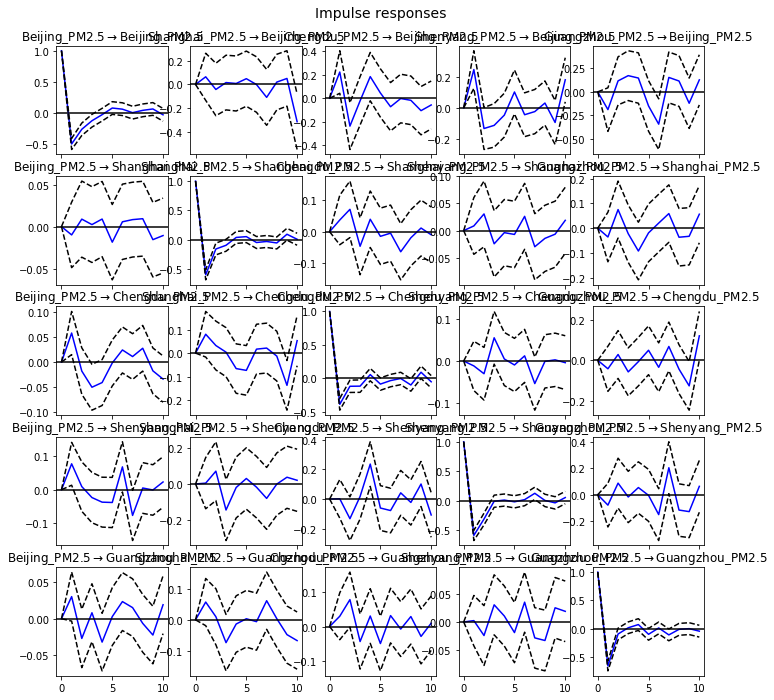

In [36]:
#impulse response analysis
irf = results.irf(10)
irf.plot(orth=False);

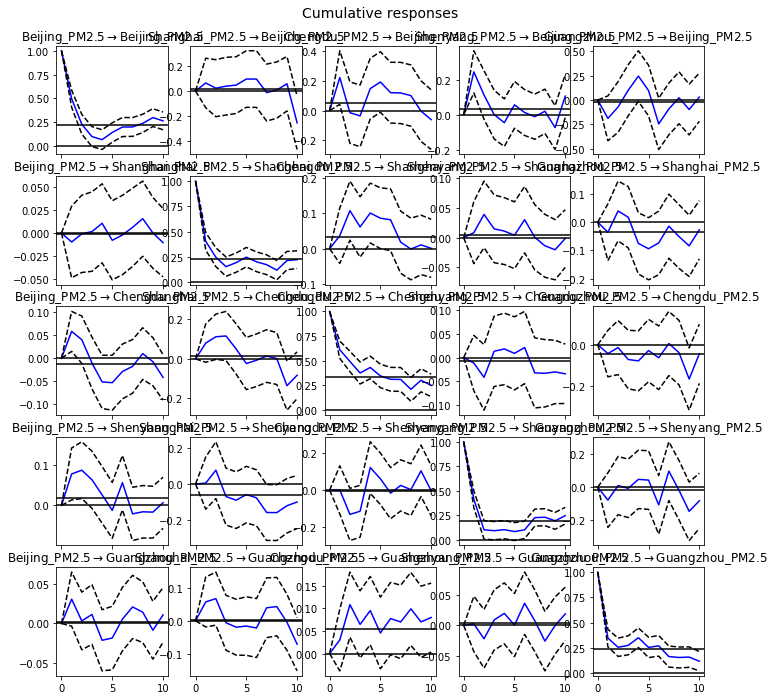

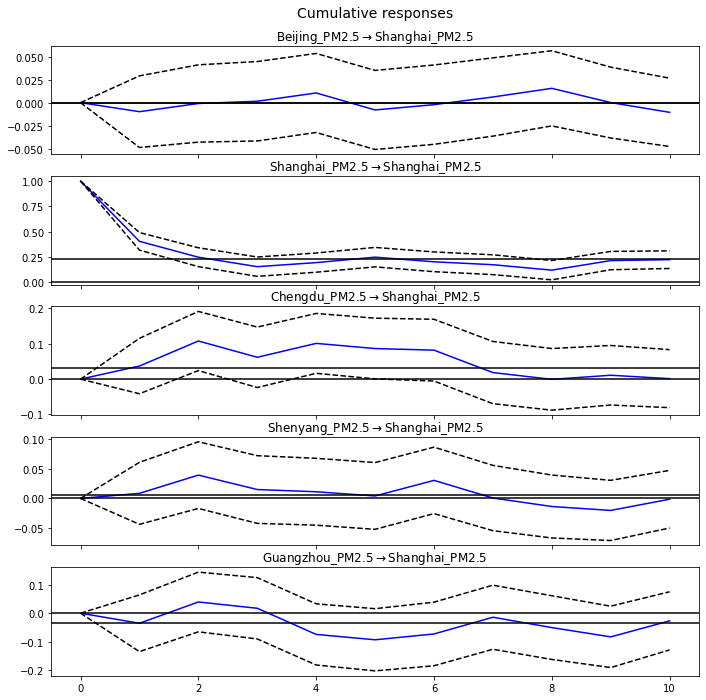

In [42]:
#impulse response analysis wiht cumulative effect
irf.plot_cum_effects(orth=False);
irf.plot_cum_effects(orth=False, response = "Shanghai_PM2.5");

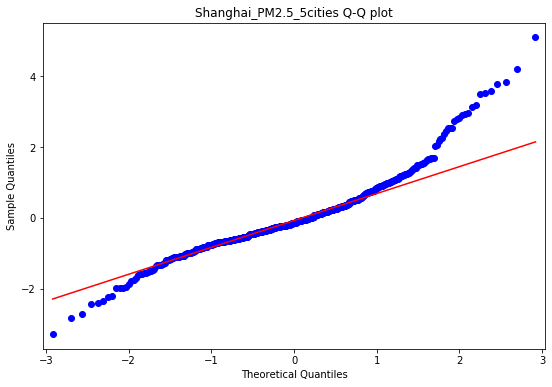

In [38]:
resid = results.resid['Shanghai_PM2.5']
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
qqplot(resid, line='q', ax=ax, fit=True)
plt.title("Shanghai_PM2.5_5cities Q-Q plot")
plt.show()

In [43]:
#Forecast Error Variance Decomposition (FEVD) method
fevd = results.fevd(5)
fevd.summary()

FEVD for Beijing_PM2.5
     Beijing_PM2.5  Shanghai_PM2.5  Chengdu_PM2.5  Shenyang_PM2.5  Guangzhou_PM2.5
0         1.000000        0.000000       0.000000        0.000000         0.000000
1         0.966365        0.001014       0.005571        0.023137         0.003913
2         0.953639        0.001523       0.012457        0.027406         0.004976
3         0.947419        0.001554       0.012191        0.031035         0.007800
4         0.938024        0.001736       0.019001        0.031412         0.009827

FEVD for Shanghai_PM2.5
     Beijing_PM2.5  Shanghai_PM2.5  Chengdu_PM2.5  Shenyang_PM2.5  Guangzhou_PM2.5
0         0.006663        0.993337       0.000000        0.000000         0.000000
1         0.005726        0.992540       0.000915        0.000130         0.000689
2         0.007915        0.980386       0.006061        0.001975         0.003663
3         0.007840        0.977351       0.007858        0.003066         0.003885
4         0.008012        0.972097     

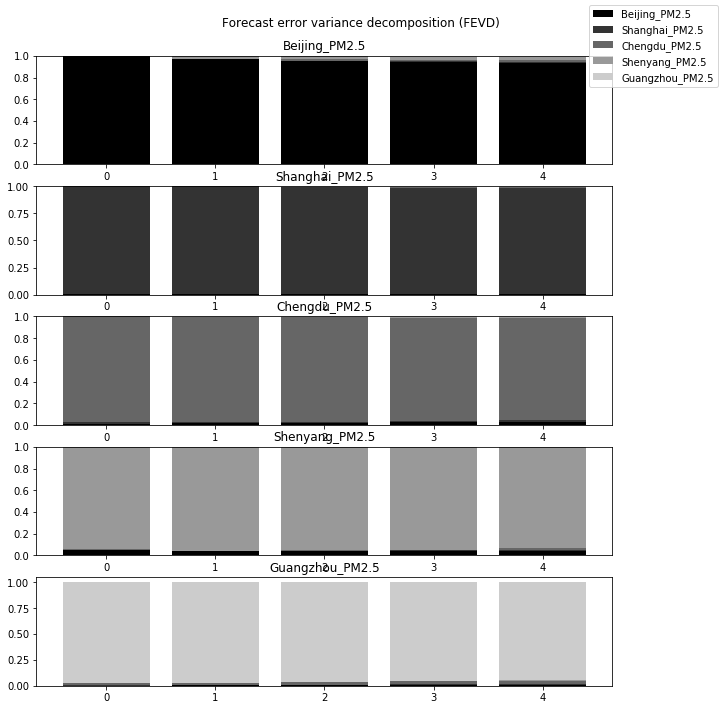

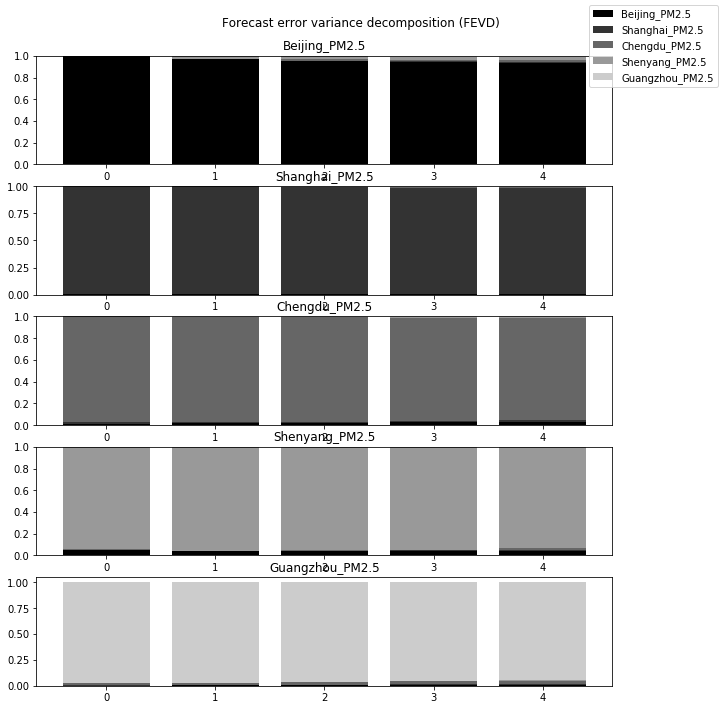

In [44]:
fevd.plot()